<a href="https://colab.research.google.com/github/KSaiNihal/Dermatology/blob/main/Dermatology_(Binary_class_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#1e9570; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span> <a class='anchor' id='install'></a>

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Dermatology (Multi-class classification)/dermatology_database_1.csv')

In [ ]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [ ]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
df.shape

(366, 35)

In [ ]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [ ]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [ ]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

In [ ]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [ ]:
df['class'].value_counts()

class
1    111
3     71
2     60
5     48
4     48
6     20
Name: count, dtype: int64

In [ ]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

In [ ]:
df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

In [ ]:
df.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

Data Visualization

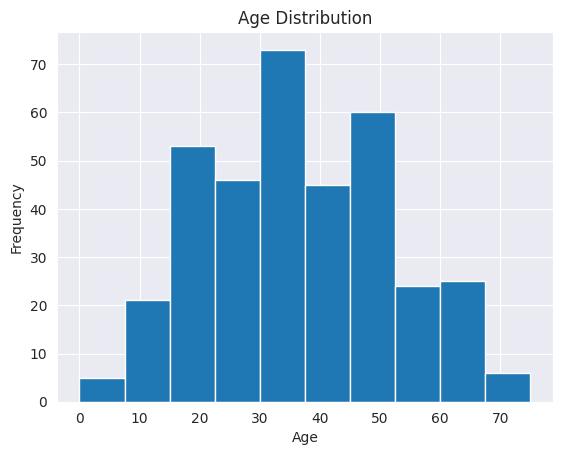

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'age' column
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

* The histogram allows us to visualize the distribution of a numerical variable, such as the 'age' column in your DataFrame. By plotting a histogram, we can understand the frequency and range of ages present in our dataset. This can help identify patterns or anomalies in the age distribution, such as whether it is skewed, normally distributed, or has any significant peaks or gaps.

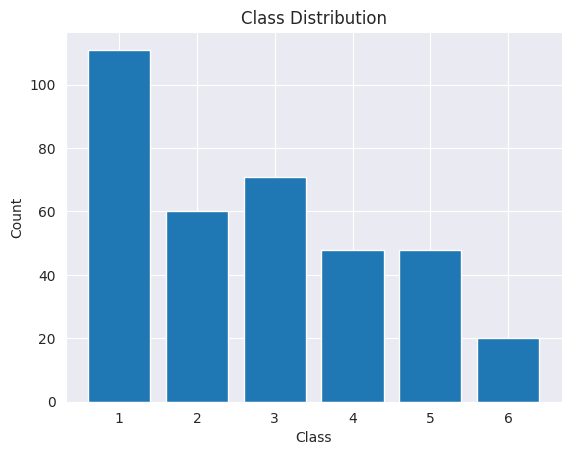

In [ ]:
# Plot a bar plot of the 'class' column
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

* The bar plot is useful for visualizing the frequency or count of different categories in a categorical variable, such as the 'class' column in our DataFrame. By plotting a bar plot, we can compare the number of instances for each class and gain insights into the class distribution. This visualization can reveal class imbalances, identify dominant or minority classes, or provide an overview of the distribution of the target variable.

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


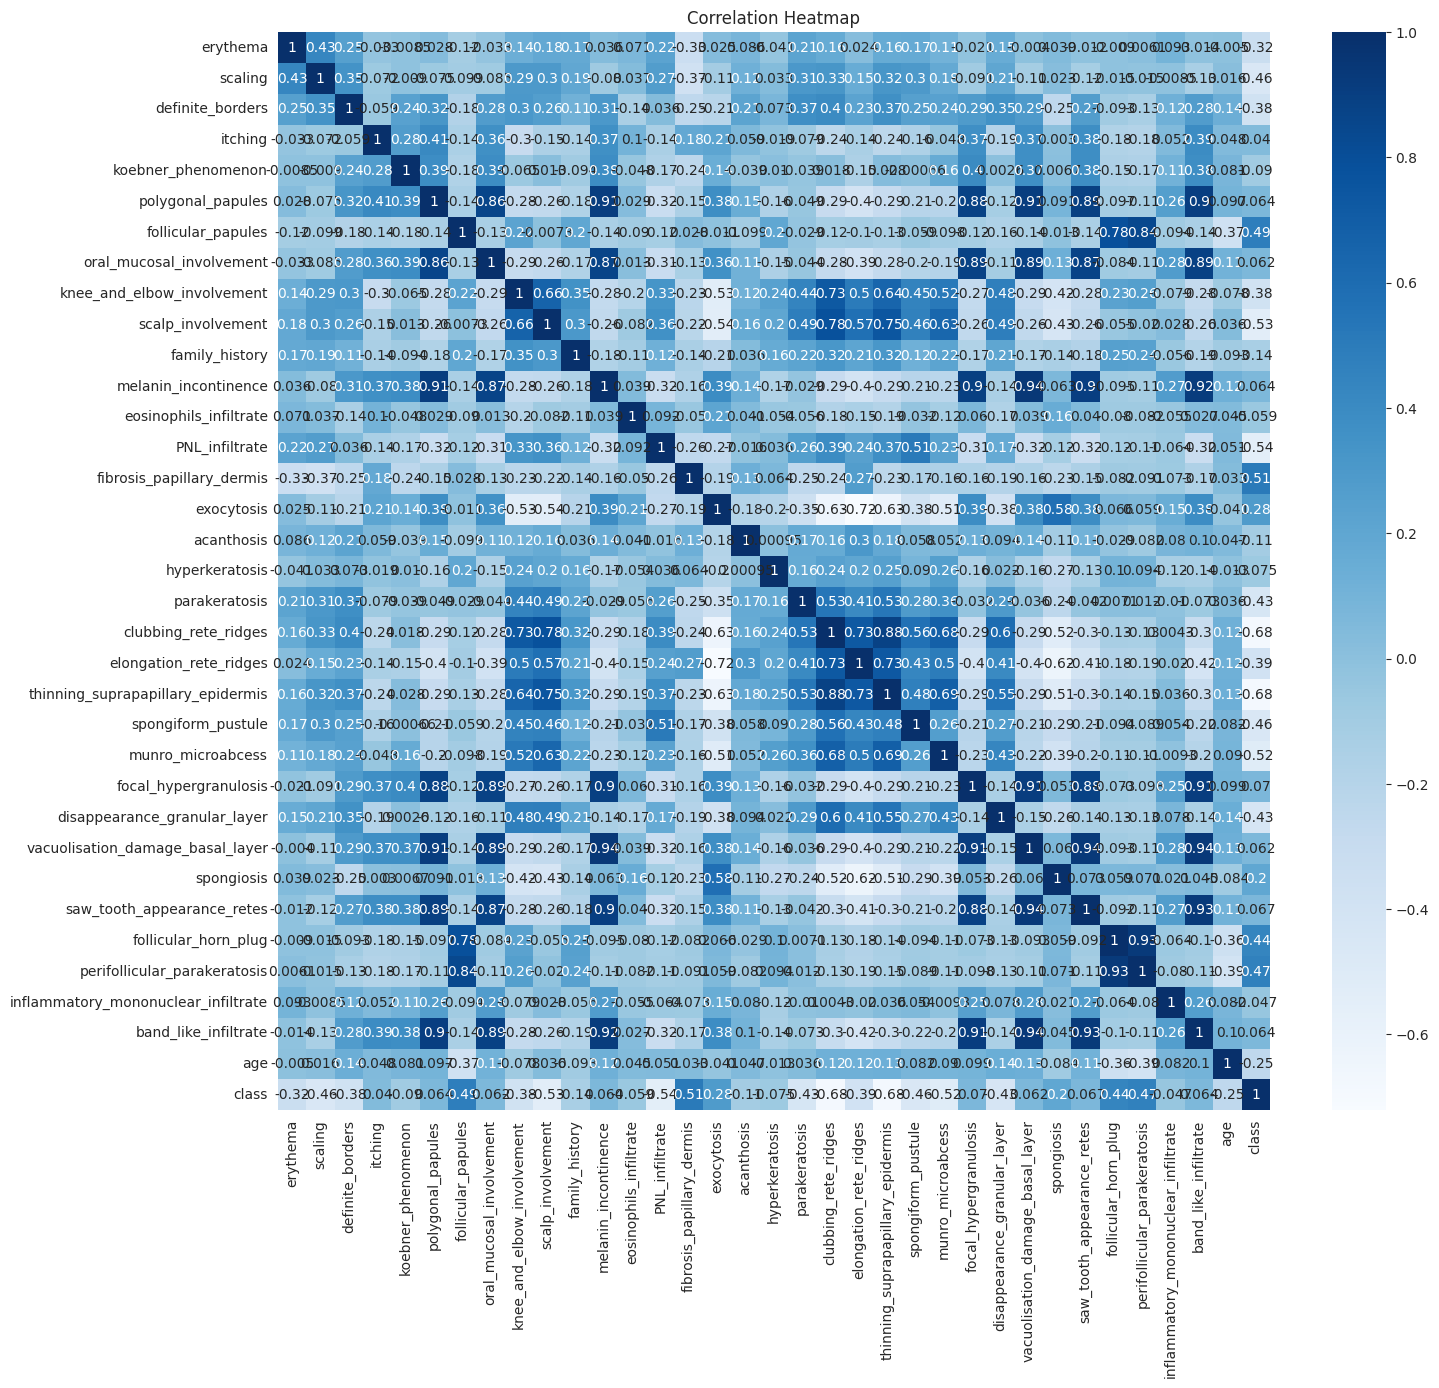

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

* The correlation heatmap helps visualize the pairwise correlations between numerical variables in our DataFrame. By calculating the correlation matrix and plotting it as a heatmap, we can identify the strength and direction of the relationships between different variables. This can assist in understanding the interdependencies between variables and identifying potential patterns or associations. For example, if two variables have a high positive correlation, it indicates that they tend to increase or decrease together. Conversely, a high negative correlation suggests an inverse relationship.

Understanding Data using t-SNE

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 51.8298569, gradient norm = 0.0296209 (50 iterations in 0.113s)
[t-SNE] Iteration 100: error = 50.9239845, gradient norm = 0.0035901 (50 iterations in 0.084s)
[t-SNE] Iteration 150: error = 50.9222946, gradient norm = 0.0190479 (50 iterations in 0.088s)
[t-SNE] Iteration 200: error = 50.9073181, gradient norm = 0.0138621 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 50.8924026, gradient norm = 0.0086349 (50 iterations in 0.092s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.892403
[t-SNE] Iteration 300: error = 0.3943576, gradient norm = 0.0095891 (50 iterations in 0.097s)
[t-SNE] Iteration 350: error = 0.3298436, gradient norm = 0.0031184 (

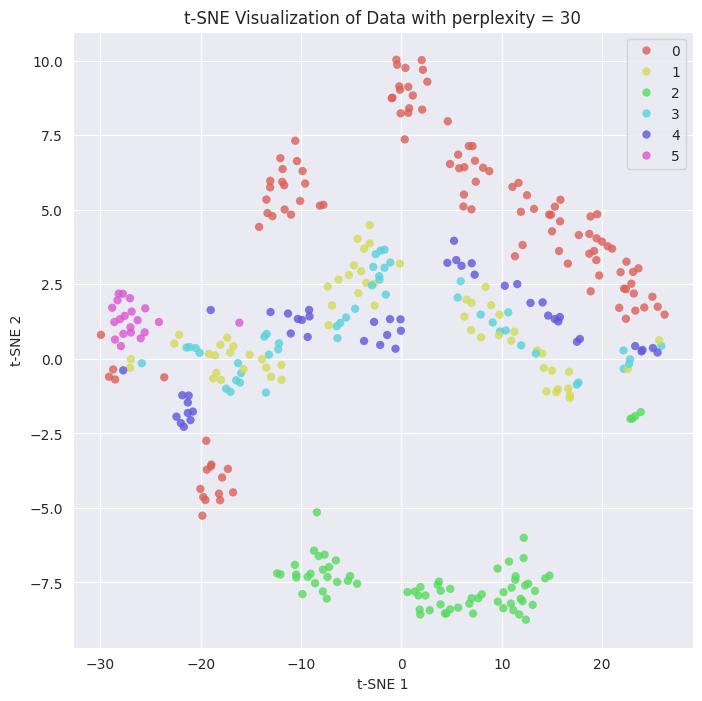

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 6.469945
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 42.4332123, gradient norm = 0.0369293 (50 iterations in 0.150s)
[t-SNE] Iteration 100: error = 41.9670181, gradient norm = 0.0000821 (50 iterations in 0.120s)
[t-SNE] Iteration 150: error = 41.9667130, gradient norm = 0.0001025 (50 iterations in 0.132s)
[t-SNE] Iteration 200: error = 41.9666748, gradient norm = 0.0001020 (50 iterations in 0.143s)
[t-SNE] Iteration 250: error = 41.9668388, gradient norm = 0.0000994 (50 iterations in 0.128s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.966839
[t-SNE] Iteration 300: error = 0.1302846, gradient norm = 0.0068698 (50 iterations in 0.142s)
[t-SNE] Iteration 350: error = 0.1201836, gradient norm = 0.0007308 

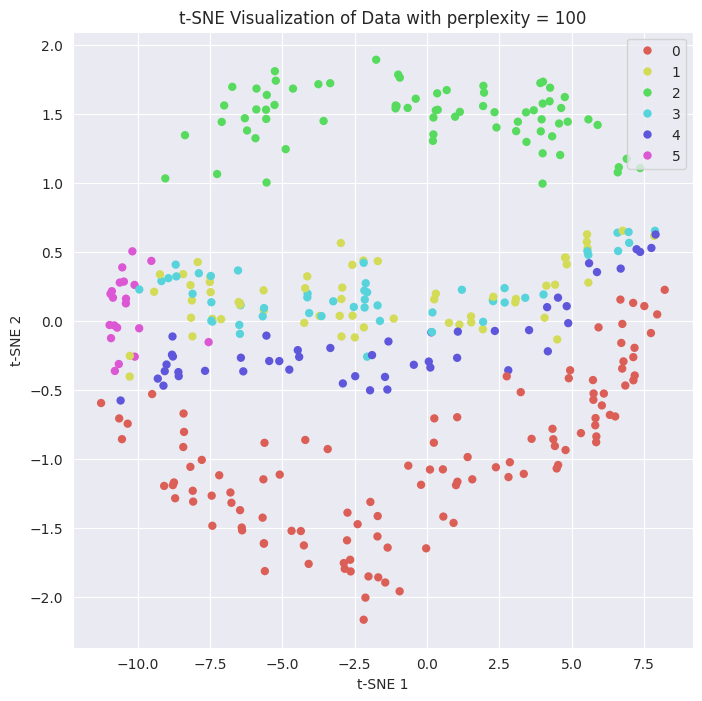

In [ ]:
# Apply t-SNE with higher perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 100)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 100')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 357 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.002s...
[t-SNE] Computed neighbors for 358 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 11.871308
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 36.1412888, gradient norm = 0.0000002 (50 iterations in 0.173s)
[t-SNE] Iteration 100: error = 36.1411057, gradient norm = 0.0000000 (50 iterations in 0.179s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 36.141106
[t-SNE] Iteration 150: error = 0.0692986, gradient norm = 0.0084707 (50 iterations in 0.152s)
[t-SNE] Iteration 200: error = 0.0257814, gradient norm = 0.0002528 (50 iterations in 0.170s)
[t-SNE] Iteration 250: error = 0.0257797, gradient norm = 0.0001381 (50 iterations in 0.211s)
[t-SNE] Iteration 300: error = 0.0258418, gradient norm = 0.0003348 (50 iterations in 0.168s)
[t-SNE] Itera

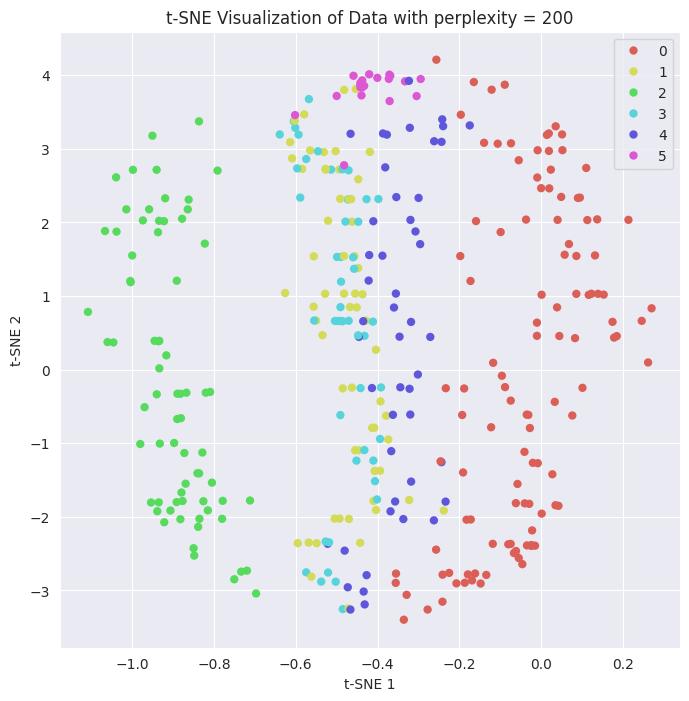

In [ ]:
# Apply t-SNE with more high perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 200)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


# plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 200')
plt.legend(loc='upper right')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>
    
* Upon analyzing the dataset, we can observe that the class features **'0', '2', and '5'** appear to be well separated and distinguishable. However, the class features **'1', '3', and '4'** exhibit overlapping patterns, making it challenging to separate them effectively. This overlapping nature may pose difficulties for our model, as it may struggle to accurately classify instances belonging to these classes. We can further examine this observation by reviewing the confusion matrix and classification report during the model evaluation process.

Preparing Data for Modelling

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 34)
(286,)
(72, 34)
(72,)


####Evaluating all ML Classifiers

In [ ]:
# Define a dictionary to store the results
results = {}

1. Logistic Regression

In [ ]:
%%time
start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 51.1 ms, sys: 863 µs, total: 51.9 ms
Wall time: 55.2 ms


2. K-Nearest Neighbors (KNN)

In [ ]:
%%time
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 165 ms, sys: 314 µs, total: 165 ms
Wall time: 229 ms


3. Gaussian Naive Bayes (GaussianNB)

In [ ]:
%%time
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 12.7 ms, sys: 943 µs, total: 13.7 ms
Wall time: 16 ms


4. Decision Trees

In [ ]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 9.45 ms, sys: 0 ns, total: 9.45 ms
Wall time: 21.8 ms


5. Random Forest

In [ ]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 231 ms, sys: 65 µs, total: 231 ms
Wall time: 245 ms


6. Extra Trees

In [ ]:
%%time
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 227 ms, sys: 0 ns, total: 227 ms
Wall time: 342 ms


7. Support Vector Machines (SVM)

In [ ]:
%%time
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 17 ms, sys: 14 µs, total: 17 ms
Wall time: 35 ms


8. Neural Networks (Multi-layer Perceptron)

In [ ]:
%%time
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 742 ms, sys: 617 ms, total: 1.36 s
Wall time: 1.89 s


9. AdaBoost

In [ ]:
%%time
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 260 ms, sys: 0 ns, total: 260 ms
Wall time: 287 ms


10. XGBoost

In [ ]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 446 ms, sys: 3.94 ms, total: 450 ms
Wall time: 627 ms


11. Light Gradient Boosting Machine (LGBM)

In [ ]:
%%time
start_time = time.time()
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['LightGBM'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 32
[LightGBM] [Info] Start training from score -1.178655
[LightGBM] [Info] Start training from score -1.849329
[LightGBM] [Info] Start training from score -1.612941
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -1.942420
[LightGBM] [Info] Start training from score -2.822778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

12. CatBoost

In [ ]:
%%time
start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

Learning rate set to 0.074233
0:	learn: 1.6306339	total: 49.3ms	remaining: 49.3s
1:	learn: 1.5070646	total: 51.4ms	remaining: 25.7s
2:	learn: 1.4207748	total: 53.4ms	remaining: 17.7s
3:	learn: 1.3199555	total: 55.4ms	remaining: 13.8s
4:	learn: 1.2505904	total: 57.6ms	remaining: 11.5s
5:	learn: 1.1652868	total: 60.2ms	remaining: 9.97s
6:	learn: 1.0790877	total: 62.1ms	remaining: 8.81s
7:	learn: 1.0086932	total: 64.2ms	remaining: 7.96s
8:	learn: 0.9405742	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8869727	total: 68.2ms	remaining: 6.75s
10:	learn: 0.8423178	total: 70.1ms	remaining: 6.3s
11:	learn: 0.7924959	total: 72.1ms	remaining: 5.94s
12:	learn: 0.7410671	total: 74.1ms	remaining: 5.62s
13:	learn: 0.7048003	total: 76ms	remaining: 5.35s
14:	learn: 0.6631168	total: 77.9ms	remaining: 5.12s
15:	learn: 0.6291249	total: 80ms	remaining: 4.92s
16:	learn: 0.5954549	total: 82ms	remaining: 4.74s
17:	learn: 0.5655816	total: 83.9ms	remaining: 4.58s
18:	learn: 0.5366418	total: 85.8ms	remaining: 4.43s

13. Stochastic Gradient Descent (SGD)

In [ ]:
%%time
start_time = time.time()
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 25.7 ms, sys: 0 ns, total: 25.7 ms
Wall time: 35.5 ms


14. Linear Discriminant Analysis (LDA)

In [ ]:
%%time
start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Linear Discriminant Analysis (LDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 19.9 ms, sys: 15.3 ms, total: 35.2 ms
Wall time: 40.8 ms


15. Quadratic Discriminant Analysis (QDA)

In [ ]:
%%time
start_time = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Quadratic Discriminant Analysis (QDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 37.2 ms


Model Result Comparison and Analysis 📈

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.944444,0.944444,0.944444,0.944444,0.049216
K-Nearest Neighbors (KNN),0.819444,0.826209,0.819444,0.821809,0.202243
GaussianNB,0.833333,0.905440,0.833333,0.801628,0.007708
Decision Trees,0.944444,0.954986,0.944444,0.943128,0.017551
Random Forest,0.958333,0.959867,0.958333,0.958607,0.240845
Extra Trees,0.972222,0.972222,0.972222,0.972222,0.333974
Support Vector Machines,0.694444,0.664198,0.694444,0.634755,0.030442
Neural Networks (Multi-layer Perceptron),0.930556,0.932359,0.930556,0.931012,1.862189
AdaBoost,0.736111,0.705929,0.736111,0.701767,0.279323
XGBoost,0.944444,0.946925,0.944444,0.944498,0.621756


## <span><h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#1e9570; border-radius: 100px 100px; text-align:left">Analysing Random Forest</h1></span> <a class='anchor' id='result'></a>

In [ ]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]


CPU times: user 180 ms, sys: 0 ns, total: 180 ms
Wall time: 181 ms


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.87      0.90        15
           2       1.00      1.00      1.00        14
           3       0.82      0.90      0.86        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



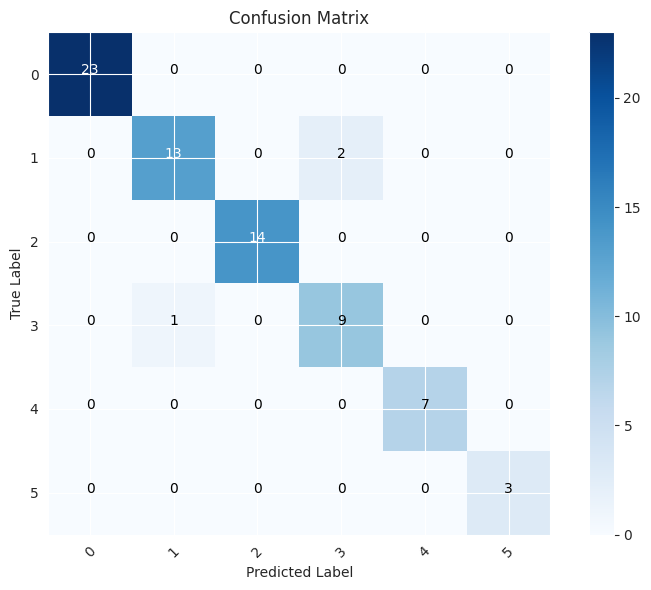

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## <span><h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#1e9570; border-radius: 100px 100px; text-align:left">Analysing Light Gradient Boosting Machine</h1></span> <a class='anchor' id='result'></a>

In [ ]:
%%time
import lightgbm as lgbm
start_time = time.time()
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['LightGBM'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 32
[LightGBM] [Info] Start training from score -1.178655
[LightGBM] [Info] Start training from score -1.849329
[LightGBM] [Info] Start training from score -1.612941
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -1.942420
[LightGBM] [Info] Start training from score -2.822778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.87      0.90        15
           2       1.00      1.00      1.00        14
           3       0.83      1.00      0.91        10
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00         3

    accuracy                           0.96        72
   macro avg       0.96      0.95      0.95        72
weighted avg       0.96      0.96      0.96        72



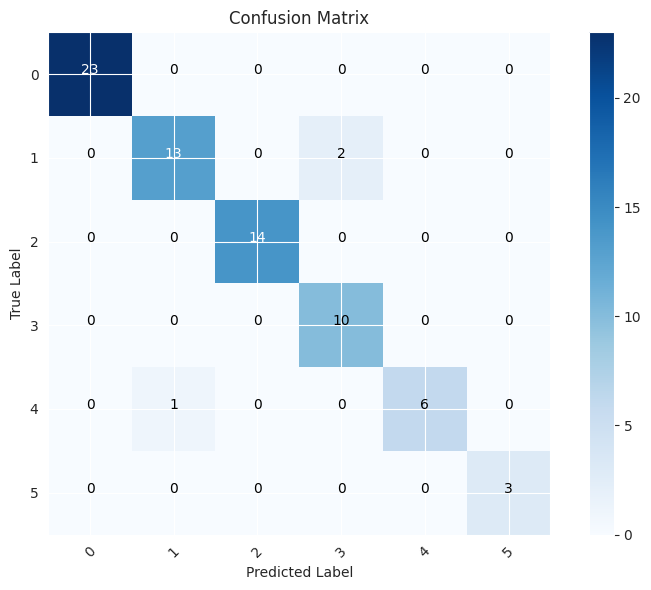

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## <span><h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#1e9570; border-radius: 100px 100px">Tuning Light Gradient Boosting Machine (LGBM)</h1></span> <a class='anchor' id='clean'></a>

In [ ]:
%%time

import lightgbm as lgbm

# Define the hyperparameter search space
space = [Real(0.01, 1.0, name='learning_rate'),
         Integer(1, 1000, name='n_estimators'),
         Integer(1, 20, name='max_depth'),
         Integer(2, 100, name='num_leaves'),
         Real(0.1, 1.0, name='subsample'),
         Real(0.1, 1.0, name='colsample_bytree'),
         Integer(2, 100, name='min_child_samples')]

# Define the objective function to be maximized
@use_named_args(space)
def objective(**params):
    clf = lgbm.LGBMClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return -score

# Define a function to keep track of the best set of hyperparameters seen so far
best_score = None
best_params = None
def on_step(optim_result):
    global best_score, best_params
    score = -optim_result.fun
    params = optim_result.x
    if best_score is None or score > best_score:
        best_score = score
        best_params = params
    print("Best score: %0.4f | Best params: %s" % (best_score, best_params))

# Run Bayesian optimization with Gaussian Processes
res = gp_minimize(objective, space, n_calls=50, random_state=42, callback=on_step, verbose=True)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

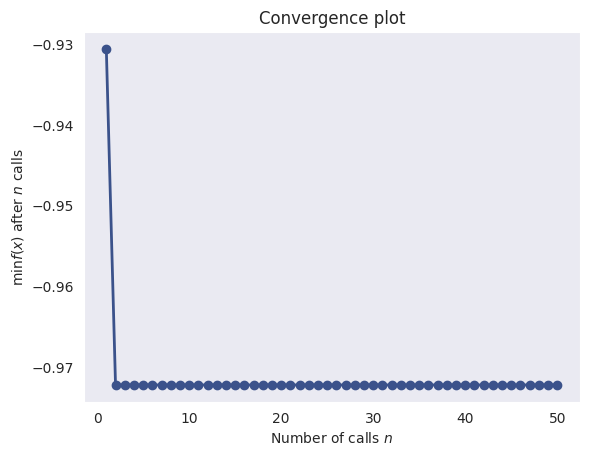

In [ ]:
# Plot the convergence of the optimization process
plot_convergence(res)

In [ ]:
# Print the best set of hyperparameters seen during the optimization process
print("Best hyperparameters: ", dict(zip([dim.name for dim in space], best_params)))
print("Accuracy on test set: ", -res.fun)

Best hyperparameters:  {'learning_rate': 0.3403715250276317, 'n_estimators': 144, 'max_depth': 13, 'num_leaves': 8, 'subsample': 0.7497988950401424, 'colsample_bytree': 0.9446974381141754, 'min_child_samples': 2}
Accuracy on test set:  0.9722222222222222


## <span><h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#1e9570; border-radius: 100px 100px">Tuning Random Forest</h1></span> <a class='anchor' id='clean'></a>

In [ ]:
%%time

# Define the hyperparameter search space
space = [Integer(1, 1000, name='n_estimators'),
               Integer(1, 20, name='max_depth'),
               Integer(2, 100, name='min_samples_split'),
               Integer(1, 100, name='min_samples_leaf'),
               Real(0.1, 1.0, name='max_features')]

# Define the objective function to be maximized
@use_named_args(space)
def objective(**params):
    clf = RandomForestClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return -score

# Define a function to keep track of the best set of hyperparameters seen so far
best_score = None
best_params = None
def on_step(optim_result):
    global best_score, best_params
    score = -optim_result.fun
    params = optim_result.x
    if best_score is None or score > best_score:
        best_score = score
        best_params = params
    print("Best score: %0.4f | Best params: %s" % (best_score, best_params))

# Run Bayesian optimization with Gaussian Processes
res = gp_minimize(objective, space, n_calls=50, random_state=42, callback=on_step, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Best score: 0.5139 | Best params: [797, 4, 78, 60, 0.5012494775682321]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.2865
Function value obtained: -0.5139
Current minimum: -0.5139
Iteration No: 2 started. Evaluating function at random point.
Best score: 0.9028 | Best params: [101, 10, 35, 15, 0.6857996256539677]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1747
Function value obtained: -0.9028
Current minimum: -0.9028
Iteration No: 3 started. Evaluating function at random point.
Best score: 0.9028 | Best params: [101, 10, 35, 15, 0.6857996256539677]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1031
Function value obtained: -0.8056
Current minimum: -0.9028
Iteration No: 4 started. Evaluating function at random point.
Best score: 0.9306 | Best params: [618, 13, 3, 3, 0.5722971942325503]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

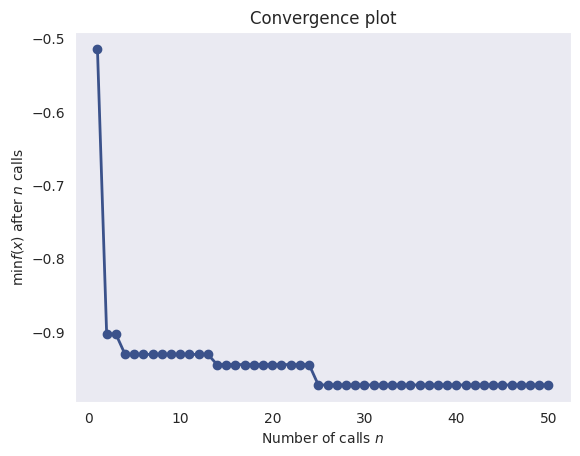

In [ ]:
# Plot the convergence of the optimization process
plot_convergence(res)

In [ ]:
# Print the best set of hyperparameters seen during the optimization process
print("Best hyperparameters: ", dict(zip([dim.name for dim in space], best_params)))
print("Accuracy on test set: ", -res.fun)

Best hyperparameters:  {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.71675903343861}
Accuracy on test set:  0.9722222222222222




<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Final Verdict:</font></h3>
    

* Bayesian Optimization has proven to be a highly efficient method for tuning models compared to traditional Random or Grid Search. In our case, it allowed us to significantly improve the accuracy of the **LGBM model from 95.83% to 97.22% in just 2 minutes and 6 seconds**. Similarly, the **Random Forest** model saw a boost in accuracy from **97.22% to 98.61% in just 1 minute and 56 seconds**. These results demonstrate the effectiveness of Bayesian Optimization in quickly identifying optimal hyperparameters and achieving notable improvements in model performance within a relatively short time frame.
    
    
* **Best Model After Tuning:** Random Forest with Accuracy on test set:  **0.9861**
    
    
* **Best hyperparameters:**  {'n_estimators': 964, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.4567212386664886}

![Upvote!](https://img.shields.io/badge/Upvote-If%20you%20like%20my%20work-07b3c8?style=for-the-badge&logo=kaggle)